In [1]:
import csv

significant_topics = list()
with open('./significant_topics.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        significant_topics.append(row[0])

In [2]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

def generate_wordcloud(in_list, n_display=10):
    """
    Generate and plot a wordcloud given words and weights
    INPUTS
    in_list: list of tuples (word, weight)
    n_display: how many words from the given list to display in the wordcloud
    """

    n_display = min(n_display, len(in_list))
    # pick only the n_display with the highest scores
    in_list = sorted(in_list, key=lambda tup: tup[1], reverse=True)
    in_list = in_list[:n_display]


    # normalize weights and convert list of tuples to dictionary
    weights = [el[1] for el in in_list]
    weights = (weights - np.min(weights))/np.ptp(weights)
    word2weight = {}
    for ii in range(len(in_list)):
        word = str(in_list[ii][0])
        weight = weights[ii]
        word2weight[word] = weight

    wc = WordCloud(width=2000, height=1500).generate_from_frequencies(word2weight)
    wc.to_file('word_cloud.png')
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show(block=False)
  
    # generate_wordcloud(neighbors_and_weights, n_display=50) # n_display is how many words you want in the image

In [3]:
import csv
import re

significant_topics = set()
with open('./significant_topics.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        topicNum = re.sub("[^0-9]", "", row[0])
        significant_topics.add(int(topicNum))
        print(topicNum)

448
492
337
374
473
478
104
10
289
386
142
98
399
461
162
231
203
157
380
404
452
382
333
346
319
148
40
79
491
115
262
112
377
366
218
369
70
237
117
105
6
265
321
126
39
211
482
221
301
99
351
274
434
239
430
444
200
303
255
28
431
320
165
150
81
393
220
276
457
201
462
292
88
335
347
443
196
113
238
298
349
484
198
257
376
322
353
263
205
403
114
74
284
185
286
109
186
297
97
226
240
132
324
49
418
235
252
63
266
50
37
489
261
357
209
352
476
469
164
167
358
174
67
437


In [6]:
word_freq = {}
with open('topicsSUM500_NBBTM.txt', 'r') as file:
    num = 0
    significant_lines = 0
    for line in file:
#         print(num, line)
        if (num-6) in significant_topics:
            print("significant num", num-6)
            significant_lines += 1
            parsed_line = line.split()
            weight = 0
            for idx, word in enumerate(parsed_line, start=0):
                if idx == 0:
                    weight = float(word)
                if idx > 0:
                    if word not in word_freq:
                        word_freq[word] = weight
                    else:
                        word_freq[word] += weight
        num += 1
        
print(significant_lines, len(significant_topics))

significant num 6
significant num 10
significant num 28
significant num 37
significant num 39
significant num 40
significant num 49
significant num 50
significant num 63
significant num 67
significant num 70
significant num 74
significant num 79
significant num 81
significant num 88
significant num 97
significant num 98
significant num 99
significant num 104
significant num 105
significant num 109
significant num 112
significant num 113
significant num 114
significant num 115
significant num 117
significant num 126
significant num 132
significant num 142
significant num 148
significant num 150
significant num 157
significant num 162
significant num 164
significant num 165
significant num 167
significant num 174
significant num 185
significant num 186
significant num 196
significant num 198
significant num 200
significant num 201
significant num 203
significant num 205
significant num 209
significant num 211
significant num 218
significant num 220
significant num 221
significant num 226

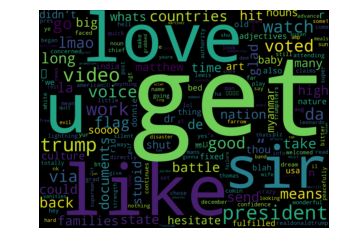

In [7]:
generate_wordcloud(list(word_freq.items()), n_display=1000)